# Visualizing some outputs from ByteTrack

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from IPython.display import display, clear_output, HTML
import time
import glob

In [2]:
CSV_PATH = "../tracks_with_crops_tuned_01.csv"
LOCAL_CROPS_DIR = "../back_lights_on_images/"

In [3]:
# Load the CSV
df = pd.read_csv(CSV_PATH)
df["frame_id_int"] = df["frame_id"].astype(int)
df = df.sort_values(["sequence", "track_id", "frame_id_int"])

In [4]:
# Add a column for local file paths (just the filename)
# df["crop_filename"] = df["crop_path"].apply(lambda x: os.path.basename(x))
# df["local_path"] = df["crop_filename"].apply(lambda x: os.path.join(LOCAL_CROPS_DIR, x))
df["local_path"] = df["crop_path"].apply(lambda x: os.path.join(LOCAL_CROPS_DIR, x.lstrip("./")))

In [5]:
# Check which files actually exist locally
df["exists_locally"] = df["local_path"].apply(os.path.exists)

print(f"Total rows in CSV: {len(df)}")
print(f"Files available locally: {df['exists_locally'].sum()}")
# print(f"Files in {LOCAL_CROPS_DIR}: {len(glob.glob(os.path.join(LOCAL_CROPS_DIR, '*.jpg')))}")

Total rows in CSV: 690719
Files available locally: 5438


In [6]:
# Get tracks that have local images
local_tracks = df[df["exists_locally"]].groupby(["sequence", "track_id"]).size()
local_tracks = local_tracks[local_tracks >= 3].sort_values(ascending=False)  # At least 3 frames

print(f"\nTracks with local images (3+ frames):")
for (seq, tid), count in local_tracks.head(10).items():
    print(f"  Sequence: {seq}, Track ID: {tid}, Frames: {count}")


Tracks with local images (3+ frames):
  Sequence: 2024-07-10-13-11-35_mapping_tartu_streets/camera_narrow_front, Track ID: 237, Frames: 37
  Sequence: 2024-07-11-15-51-59_mapping_tartu_streets/camera_wide_front, Track ID: 538, Frames: 31
  Sequence: 2024-07-10-13-11-35_mapping_tartu_streets/camera_wide_front, Track ID: 200, Frames: 27
  Sequence: 2024-07-11-15-51-59_mapping_tartu_streets/camera_narrow_front, Track ID: 347, Frames: 26
  Sequence: 2024-08-22-10-38-05_mapping_tartu_streets_bus_stops/camera_narrow_front, Track ID: 1, Frames: 25
  Sequence: 2024-04-18-14-25-15_mapping_tartu_streets/camera_fl, Track ID: 1, Frames: 25
  Sequence: 2024-07-11-15-51-59_mapping_tartu_streets/camera_narrow_front, Track ID: 688, Frames: 23
  Sequence: 2024-04-16-16-37-25_mapping_tartu_streets/camera_fl, Track ID: 20, Frames: 23
  Sequence: 2024-07-11-15-51-59_mapping_tartu_streets/camera_wide_front, Track ID: 313, Frames: 21
  Sequence: 2024-07-08-12-15-50_mapping_tartu_streets/camera_narrow_front

In [7]:
df.head(20)

,sequence,track_id,frame_id,class_id,score,x1,y1,x2,y2,crop_path,img_path,width,height,frame_id_int,crop_filename,local_path,exists_locally
0,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,0,2,0.896628,826,1228,1013,1367,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,0,0000002.jpg,../ByteTrack_images/0000002.jpg,True
1,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,1,2,0.902721,813,1228,1006,1367,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,1,0000012.jpg,../ByteTrack_images/0000012.jpg,True
2,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,2,2,0.903672,800,1227,998,1364,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,2,0000022.jpg,../ByteTrack_images/0000022.jpg,True
3,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,3,2,0.895926,784,1227,988,1363,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,3,0000032.jpg,../ByteTrack_images/0000032.jpg,True
4,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,4,2,0.906801,766,1227,976,1361,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,4,0000042.jpg,../ByteTrack_images/0000042.jpg,True
5,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,5,2,0.884779,748,1228,963,1360,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,5,0000058.jpg,../ByteTrack_images/0000058.jpg,True
6,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,6,2,0.892543,727,1227,950,1359,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,6,0000062.jpg,../ByteTrack_images/0000062.jpg,True
7,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,7,2,0.878652,707,1229,933,1357,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,7,0000075.jpg,../ByteTrack_images/0000075.jpg,True
8,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,8,2,0.886926,684,1225,913,1354,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,8,0000086.jpg,../ByteTrack_images/0000086.jpg,True
9,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,9,2,0.898587,660,1226,896,1353,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,9,0000092.jpg,../ByteTrack_images/0000092.jpg,False


In [30]:
def show_track_grid(sequence, track_id, max_frames=20, cols=5, figsize=None, show_diagnostics=True):
    track_df = df[(df["sequence"] == sequence) & 
                  (df["track_id"] == track_id) & 
                  (df["exists_locally"])].copy()
    track_df = track_df.sort_values("frame_id_int").head(max_frames)
    
    if len(track_df) == 0:
        print(f"No local images found for sequence={sequence}, track_id={track_id}")
        return
    
    n_frames = len(track_df)
    rows = (n_frames + cols - 1) // cols
    
    if figsize is None:
        figsize = (cols * 3, rows * 3.5)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Handle single row/column cases
    if rows == 1 and cols == 1:
        axes = [[axes]]
    elif rows == 1:
        axes = [axes]
    elif cols == 1:
        axes = [[ax] for ax in axes]
    
    for idx, (_, row) in enumerate(track_df.iterrows()):
        r = idx // cols
        c = idx % cols
        ax = axes[r][c]
        
        img = Image.open(row["local_path"])
        crop_w, crop_h = img.size
        ax.imshow(img)
        
        # Show frame, crop filename, and size
        title = f"Frame {row['frame_id']}\n{crop_w}x{crop_h}px"
        ax.set_title(title, fontsize=8)
        ax.axis('off')
    
    # Hide empty subplots
    for idx in range(n_frames, rows * cols):
        r = idx // cols
        c = idx % cols
        axes[r][c].axis('off')
    
    plt.suptitle(f"Track {track_id} in {sequence}\n", 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [32]:
def compare_tracks_side_by_side(sequence, track_id_1, track_id_2, max_frames=10):
    track1 = df[(df["sequence"] == sequence) & 
                (df["track_id"] == track_id_1) & 
                (df["exists_locally"])].sort_values("frame_id_int").head(max_frames)
    
    track2 = df[(df["sequence"] == sequence) & 
                (df["track_id"] == track_id_2) & 
                (df["exists_locally"])].sort_values("frame_id_int").head(max_frames)
    
    n_frames = max(len(track1), len(track2))
    
    fig, axes = plt.subplots(2, n_frames, figsize=(n_frames * 2, 5))
    
    for i in range(n_frames):
        # Track 1
        if i < len(track1):
            row = track1.iloc[i]
            img = Image.open(row["local_path"])
            axes[0, i].imshow(img)
            axes[0, i].set_title(f"T{track_id_1} F{row['frame_id']}", fontsize=8)
        axes[0, i].axis('off')
        
        # Track 2
        if i < len(track2):
            row = track2.iloc[i]
            img = Image.open(row["local_path"])
            axes[1, i].imshow(img)
            axes[1, i].set_title(f"T{track_id_2} F{row['frame_id']}", fontsize=8)
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

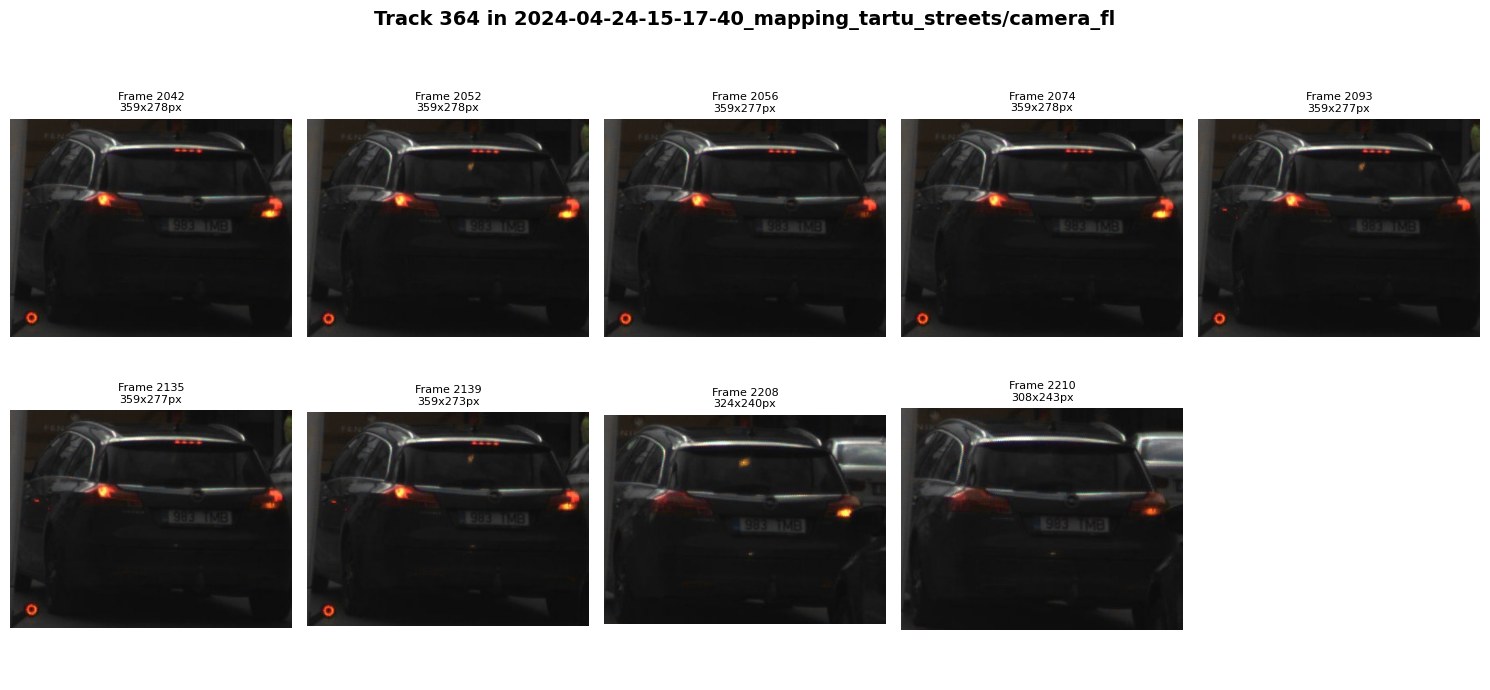

In [33]:
if len(local_tracks) > 0:
    seq, tid = local_tracks.index[100]
    show_track_grid(seq, tid, max_frames=40, cols=5)

# Animate

In [7]:
def animate_track(sequence, track_id, delay=0.3, figsize=(10, 8)):
    track_df = df[(df["sequence"] == sequence) & 
                  (df["track_id"] == track_id) & 
                  (df["exists_locally"])].copy()
    track_df = track_df.sort_values("frame_id_int")
    
    if len(track_df) == 0:
        print(f"No local images found for sequence={sequence}, track_id={track_id}")
        return
    
    print(f"Animating Track {track_id} from {sequence}")
    print(f"Total frames: {len(track_df)}")
    print(f"Frame range: {track_df['frame_id_int'].min()} - {track_df['frame_id_int'].max()}")
    print("Press Ctrl+C to stop\n")
    
    fig, ax = plt.subplots(figsize=figsize)
    
    try:
        for idx, row in track_df.iterrows():
            img = Image.open(row["local_path"])
            
            ax.clear()
            ax.imshow(img)
            ax.set_title(f"Track {track_id} | Frame {row['frame_id']} | Score: {row['score']:.3f}", 
                        fontsize=14, fontweight='bold')
            ax.axis('off')
            
            display(fig)
            clear_output(wait=True)
            time.sleep(delay)
    except KeyboardInterrupt:
        print("\nAnimation stopped")
    finally:
        plt.close(fig)

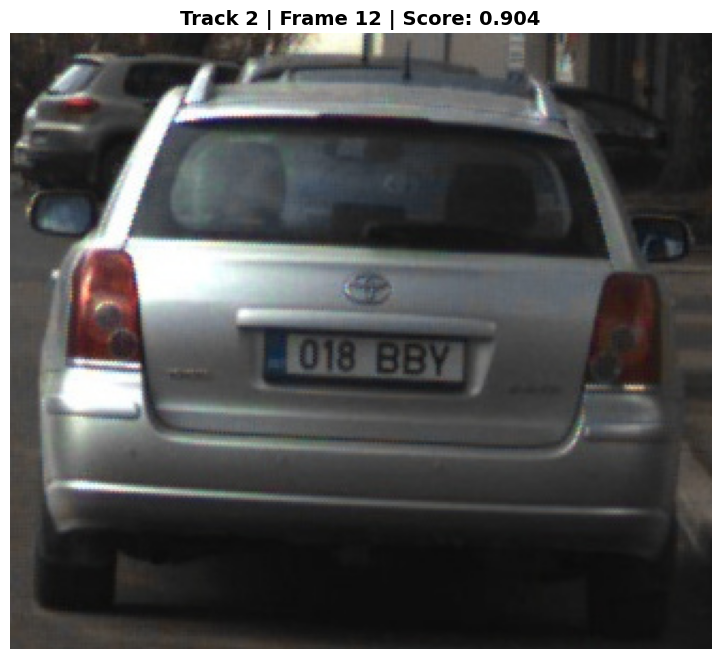

In [13]:
animate_track(seq, tid, delay=0.3)

In [31]:
def create_gif(sequence, track_id, output_path="track_animation.gif", duration=200, max_frames=None):
    track_df = df[(df["sequence"] == sequence) & 
                  (df["track_id"] == track_id) & 
                  (df["exists_locally"])].copy()
    track_df = track_df.sort_values("frame_id_int")
    
    if max_frames:
        track_df = track_df.head(max_frames)
    
    if len(track_df) == 0:
        print(f"No local images found")
        return
    
    images = []
    for _, row in track_df.iterrows():
        img = Image.open(row["local_path"])
        # Add frame info to image
        from PIL import ImageDraw, ImageFont
        img_with_text = img.copy()
        draw = ImageDraw.Draw(img_with_text)
        text = f"Frame {row['frame_id']} | Score: {row['score']:.3f}"
        # Use default font
        draw.text((10, 10), text, fill='white')
        draw.text((10, 10), text, fill='black')  # Shadow effect
        images.append(img_with_text)
    
    # Save as GIF
    images[0].save(
        output_path,
        save_all=True,
        append_images=images[1:],
        duration=duration,
        loop=0
    )
    print(f"GIF saved to: {output_path}")
    print(f"Frames: {len(images)}, Duration: {duration}ms per frame")
    
    # Display in notebook
    return HTML(f'<img src="{output_path}">')

In [ ]:
# Example 3: Create GIF (uncomment to use)
# create_gif(seq, tid, output_path="my_track.gif", duration=300, max_frames=20)

# Example 4: Compare two tracks (uncomment to use)
# if len(local_tracks) >= 2:
#     seq1, tid1 = local_tracks.index[0]
#     seq2, tid2 = local_tracks.index[1]
#     if seq1 == seq2:  # Same sequence
#         compare_tracks_side_by_side(seq1, tid1, tid2, max_frames=10)